<a href="https://colab.research.google.com/github/dudududukim/Deeplearning_learning/blob/MNIST/CNN_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.4.1:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.4.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.4.1


In [1]:
pip install tensorflow==1.4.0

In [2]:
  import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [13]:
#epoch와 batch를 이용
 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
 
tf.set_random_seed(777)  # for reproducibility
 
'''
from tensorflow.examples.tutorials.mnist import input_data
 
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
 
nb_classes = 10
'''
#file input from google drive
xy=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/train.csv',delimiter=',',dtype=np.float32)
x_data = xy[:,1:]
y_data = xy[:,0]
 
xy_test=np.loadtxt('/content/drive/MyDrive/tensorflow/mnist/mnist_test.csv',delimiter=',',dtype=np.float32)
test_x = xy_test[:,1:]
test_y = xy_test[:,0]
 
'''
filename_queue = tf.train.string_input_producer(
    ['/content/drive/MyDrive/tensorflow/mnist/train.csv'], shuffle=False, name='filename_queue')
 
reader=tf.TextLineReader()
key, value = reader.read(filename_queue)
 
record_defaults=[[0.]]*785
xy=tf.decode_csv(value, record_defaults=record_defaults)
 
train_x, train_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=1000))
test_x, test_y =(tf.train.batch([xy[1:], xy[:1]],batch_size=100))
'''
 
print('Data loaded!!')

Data loaded!!


(1, 3, 3, 1)


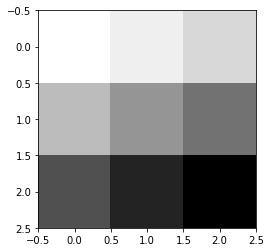

In [3]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

In [4]:
w=np.array([[[1.],[1.]],
            [[1.],[1.]]], dtype=np.float32)

1. tf.nn.conv2d: 
https://www.tensorflow.org/api_docs/python/tf/nn/conv2d


2. np.swapaxes: https://supermemi.tistory.com/15

3. 

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
conv2d_image
 [[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
[[12. 16.]
 [24. 28.]]


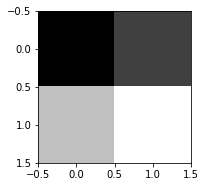

In [5]:
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')

#tensor인 conv2d를 np array로 바꿔주는 역할
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print("conv2d_image\n", conv2d_img)

#사실 1x2x2x1인 array에서 swapaxes는 의미 없는듯?
#conv2d_img = np.swapaxes(conv2d_img, 0, 3)
#print('conv2d_swap_img\n', conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
conv2d_image
 [[[[12.]
   [16.]
   [ 9.]]

  [[24.]
   [28.]
   [15.]]

  [[15.]
   [17.]
   [ 9.]]]]
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


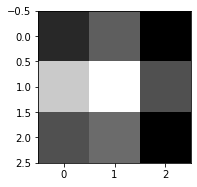

In [6]:
#padding same(same이면 본래 image와 같은크기의 img가 나옴)

print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')

#tensor인 conv2d를 np array로 바꿔주는 역할
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print("conv2d_image\n", conv2d_img)

#사실 1x2x2x1인 array에서 swapaxes는 의미 없는듯?
#conv2d_img = np.swapaxes(conv2d_img, 0, 3)
#print('conv2d_swap_img\n', conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

3. for i in enumerate(): https://wikidocs.net/16045

4. plt.subplot(*args, **kwargs): https://matplotlib.org/3.3.4/api/_as_gen/matplotlib.pyplot.subplot.html

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
conv2d_image
 [[[[ 12.    6.  -12. ]
   [ 16.    8.  -16. ]
   [  9.    4.5  -9. ]]

  [[ 24.   12.  -24. ]
   [ 28.   14.  -28. ]
   [ 15.    7.5 -15. ]]

  [[ 15.    7.5 -15. ]
   [ 17.    8.5 -17. ]
   [  9.    4.5  -9. ]]]]
conv2d_image_swap
 [[[[ 12. ]
   [ 16. ]
   [  9. ]]

  [[ 24. ]
   [ 28. ]
   [ 15. ]]

  [[ 15. ]
   [ 17. ]
   [  9. ]]]


 [[[  6. ]
   [  8. ]
   [  4.5]]

  [[ 12. ]
   [ 14. ]
   [  7.5]]

  [[  7.5]
   [  8.5]
   [  4.5]]]


 [[[-12. ]
   [-16. ]
   [ -9. ]]

  [[-24. ]
   [-28. ]
   [-15. ]]

  [[-15. ]
   [-17. ]
   [ -9. ]]]]
index : 0, value: 
[[[12.]
  [16.]
  [ 9.]]

 [[24.]
  [28.]
  [15.]]

 [[15.]
  [17.]
  [ 9.]]]
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
index : 1, value: 
[[[ 6. ]
  [ 8. ]
  [ 4.5]]

 [[12. ]
  [14. ]
  [ 7.5]]

 [[ 7.5]
  [ 8.5]
  [ 4.5]]]
[[ 6.   8.   4.5]
 [12.  14.   7.5]
 [ 7.5  8.5  4.5]]
index : 2, value: 
[[[-12.]
  [-16.]
  [ -9.]]



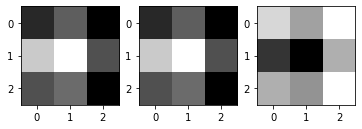

In [7]:
#padding same(same이면 본래 image와 같은크기의 img가 나옴)
#filter의 개수 증가

print("image.shape", image.shape)
weight = tf.constant([[[[1., 0.5, -1.]],[[1., 0.5, -1.]]],
                      [[[1., 0.5, -1.]],[[1., 0.5, -1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')

#tensor인 conv2d를 np array로 바꿔주는 역할
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
print("conv2d_image\n", conv2d_img)

#사실 1x2x2x1인 array에서 swapaxes는 의미 없는듯?
#이 아니라 filter가 많아지면 의미있음
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
print("conv2d_image_swap\n", conv2d_img)
for i, one_img in enumerate(conv2d_img):
  print("index : {}, value: \n{}".format(i,one_img))
  print(one_img.reshape(3,3))
  plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

5. tf.nn.max_pool(input, ksize, strides, padding, data_format=None, name=None) : https://www.tensorflow.org/api_docs/python/tf/nn/max_pool

In [10]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [ ]:
image = x_data[0]
print(image.reshape(1,28,28,1))

image.shape (1, 28, 28, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 28, 28, 1)
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.    0.  188.  443.  349.   94.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
     0.    0.    0.    0.    0.    0.  191.  629.  946.  695.  187.    0.
     0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.   

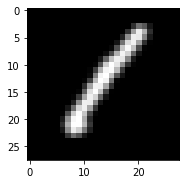

In [26]:
image=image.reshape(1,28,28,1)
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')

#tensor인 conv2d를 np array로 바꿔주는 역할
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
#print("conv2d_image\n", conv2d_img)

#사실 1x2x2x1인 array에서 swapaxes는 의미 없는듯?
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
#print('conv2d_swap_img\n', conv2d_img)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(28,28))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')

(1, 28, 28, 1)


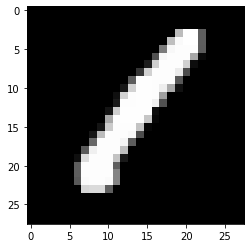

In [25]:
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
plt.imshow(pool.eval().reshape(28,28), cmap='gray')

(3, 3, 1, 5)
[[[[-0.00296431 -0.01652618 -0.00589791 -0.01408991 -0.00418498]]

  [[-0.00460558 -0.00519777 -0.01137976 -0.00345812 -0.00899411]]

  [[ 0.00350656 -0.01423041  0.00203009 -0.0087888  -0.00502453]]]


 [[[-0.00745511 -0.0128881   0.00663817  0.00555867 -0.00744454]]

  [[-0.00523539  0.00913174  0.00502904  0.01132299  0.02436396]]

  [[ 0.00346043 -0.01028724 -0.00423652  0.00147867  0.00060864]]]


 [[[ 0.00020771  0.00725557 -0.02013093  0.0106123   0.01417744]]

  [[-0.00255514 -0.01014748 -0.00316114  0.01383515 -0.00398   ]]

  [[ 0.00145773  0.01655586  0.00805706 -0.00353084  0.00738818]]]]
(1, 14, 14, 5)


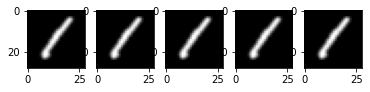

In [47]:
sess=tf.InteractiveSession()

image=x_data[2]
image=image.reshape(-1,28,28,1)
W1= tf.Variable(tf.random_normal([3,3,1,5],stddev=0.01))
print(W1.shape)
sess.run(tf.global_variables_initializer())
print(sess.run(W1))
conv2d=tf.nn.conv2d(image,W1,strides=[1,2,2,1],padding='SAME')
conv2d_img=conv2d.eval()
print(conv2d_img.shape)
conv2d_img=np.swapaxes(conv2d_img,0,3)
for i,one_image in enumerate(conv2d_img):
  plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(28,28), cmap='gray')

(1, 7, 7, 5)


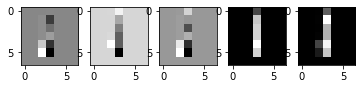

In [60]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='VALID')
print(pool.shape)
pool_img=pool.eval()
pool_img=np.swapaxes(pool_img, 0, 3)
for i, img in enumerate(pool_img):
  plt.subplot(1,5,i+1), plt.imshow(img.reshape(7,7),cmap='gray')